<a href="https://colab.research.google.com/github/URAM-KOR/vgames2/blob/main/AI_05_%EA%B9%80%EC%9A%B0%EB%9E%8C_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

지역에 따라서 선호하는 게임 장르가 다를까 라는 질문에 대답을 하셔야합니다.

                     Year  NA_Sales  EU_Sales  JP_Sales  Other_Sales
Genre                                                               
Action        1999.366132  0.258142  0.155809  0.047340     0.056009
Adventure     2001.908661  0.081953  0.049891  0.040523     0.012914
Fighting      1990.491018  0.261913  0.117828  0.101535     0.042668
Misc          1995.529032  0.232843  0.120842  0.060467     0.042434
Platform      1985.735698  0.499118  0.219446  0.146900     0.057704
Puzzle        1977.024691  0.212664  0.087059  0.098391     0.021574
Racing        1988.617213  0.277747  0.189107  0.045149     0.061689
Role-Playing  1996.148022  0.214390  0.122704  0.224659     0.037316
Shooter       1987.249219  0.435344  0.234572  0.029220     0.077913
Simulation    1994.783274  0.207769  0.129757  0.072162     0.036312
Sports        1996.832971  0.285523  0.159180  0.057206     0.057010
Strategy      1990.970149  0.099485  0.066471  0.071206     0.016250


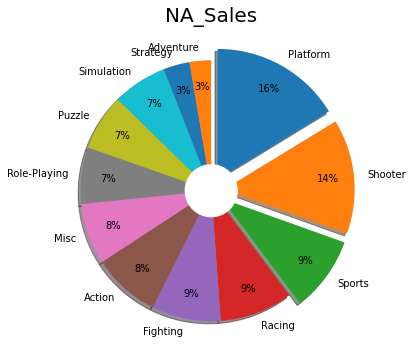

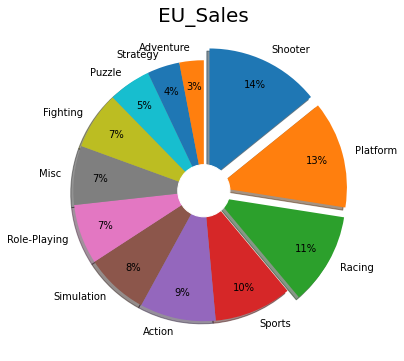

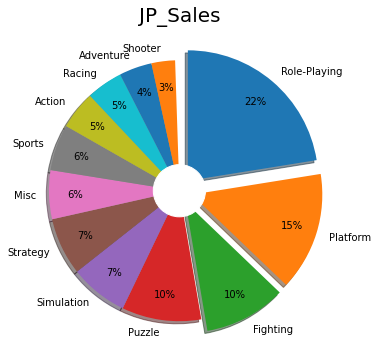

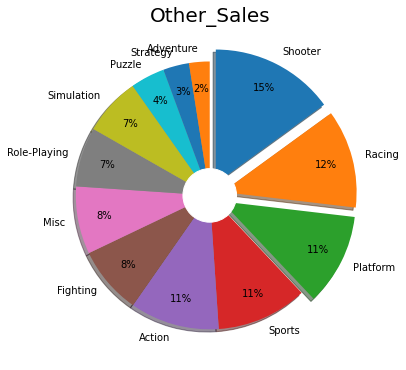

Genre
Shooter         0.077913
Racing          0.061689
Platform        0.057704
Sports          0.057010
Action          0.056009
Fighting        0.042668
Misc            0.042434
Role-Playing    0.037316
Simulation      0.036312
Puzzle          0.021574
Strategy        0.016250
Adventure       0.012914
Name: Other_Sales, dtype: float64


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51648 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 50669 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54032 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47588 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47049 missing from current font.
  font.set_

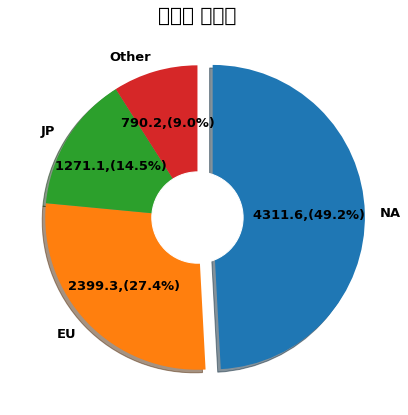

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 52509 missing from current font.
  font.set_text(s, 0, flags=flags)


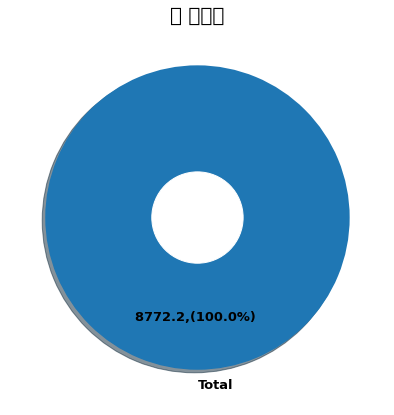

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
df_nara = df.groupby('Genre').mean()  # Genre 별 합 
print(df_nara)
df_nara['Genre'] = df_nara.index
df_na = df_nara.sort_values(by = ['NA_Sales'], ascending = False)  # 나라별 내림차순
df_eu = df_nara.sort_values(by = ['EU_Sales'], ascending = False)
df_jp = df_nara.sort_values(by = ['JP_Sales'], ascending = False)
df_other = df_nara.sort_values(by = ['Other_Sales'], ascending = False)


# 원형그래프
# NA_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_na['NA_Sales'],
        labels=df_na['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('NA_Sales', fontsize=20)
plt.show()

# EU_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_eu['EU_Sales'],
        labels=df_eu['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('EU_Sales', fontsize=20)
plt.show()

# JP_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,6))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_jp['JP_Sales'],
        labels=df_jp['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8 , 
        counterclock= 0)
plt.title('JP_Sales', fontsize=20)
plt.show()

# Other_Sales
centre_circle = plt.Circle((0,0),0.20,color='white')
plt.figure(figsize=(6,7))
plt.gca().add_artist(centre_circle)
plt.pie(explode = (0.1,0.1,0.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0),
        x = df_other['Other_Sales']*100,
        labels=df_other['Genre'], 
        shadow=True, 
        startangle=90, 
        autopct= '%1.0f%%', 
        pctdistance=0.8,
        counterclock= 0)
plt.title('Other_Sales', fontsize=20)
plt.show()
print(df_other['Other_Sales'])


#########################################################
# 원형그래프
# Sales rate

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.figure(figsize=(7,7))
plt.gca().add_artist(centre_circle)
values = df['NA_Sales'].sum(),df['EU_Sales'].sum(),df['JP_Sales'].sum(),df['Other_Sales'].sum(),
plt.pie(explode = (0.1,0,0,0.0),
        x = [df['NA_Sales'].sum(),df['EU_Sales'].sum(),df['JP_Sales'].sum(),df['Other_Sales'].sum()],
        labels=['NA','EU','JP','Other'], 
        shadow=True, 
        startangle=90, 
        autopct = (lambda p:f'{p*sum(values)/100 :.1f},({p:.1f}%) '),     
        pctdistance=0.65 ,
        textprops=dict(color='k', weight='bold', fontsize=13), 
        counterclock= 0)
plt.title('지역별 판매량', fontsize=20)
plt.show()

centre_circle = plt.Circle((0,0),0.30,color='white')
plt.figure(figsize=(7,7))
plt.gca().add_artist(centre_circle)
values2 = df['NA_Sales'].sum()+df['EU_Sales'].sum()+df['JP_Sales'].sum()+df['Other_Sales'].sum(),
plt.pie(
        x = [df['NA_Sales'].sum()+df['EU_Sales'].sum()+df['JP_Sales'].sum()+df['Other_Sales'].sum()],
        labels=['Total'], 
        shadow=True, 
        startangle=90, 
        autopct = (lambda p:f'{p*sum(values2)/100 :.1f},({p:.1f}%) '),     
        pctdistance=0.65 ,
        textprops=dict(color='k', weight='bold', fontsize=13), 
        counterclock= 0)
plt.title('총 판매량', fontsize=20)
plt.show()


연도별 게임의 트렌드가 있을까 라는 질문에 대답을 하셔야합니다.

a <= Year <= b
a 입력하세요
b 입력하세요


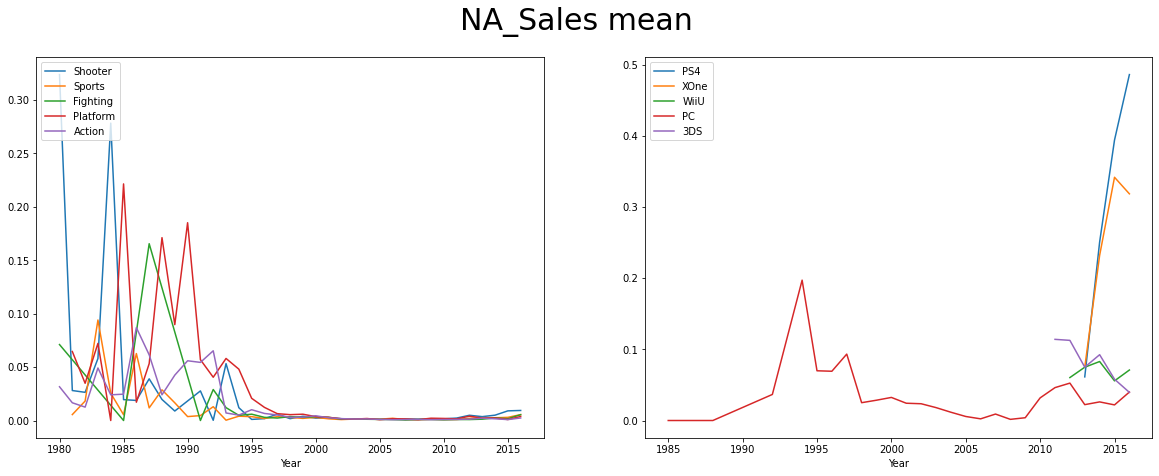

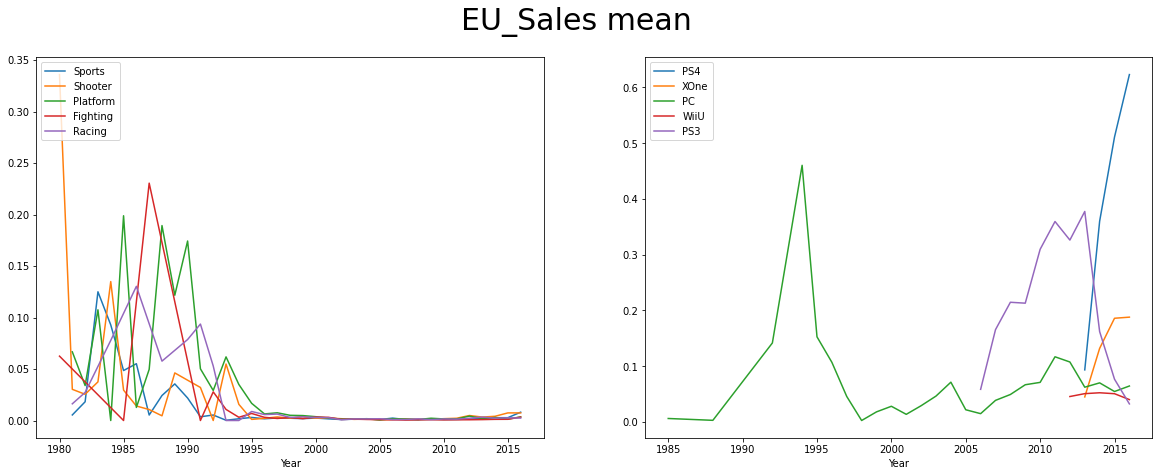

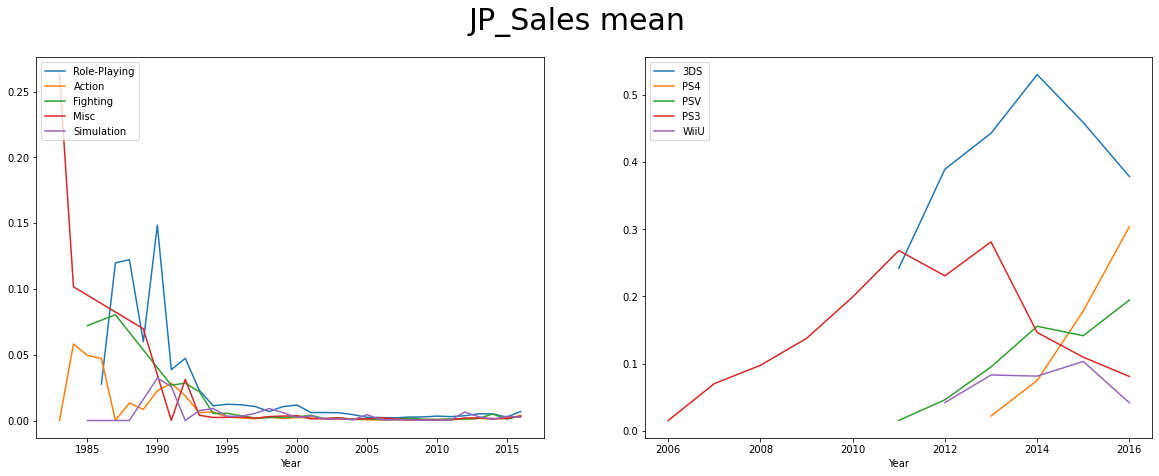

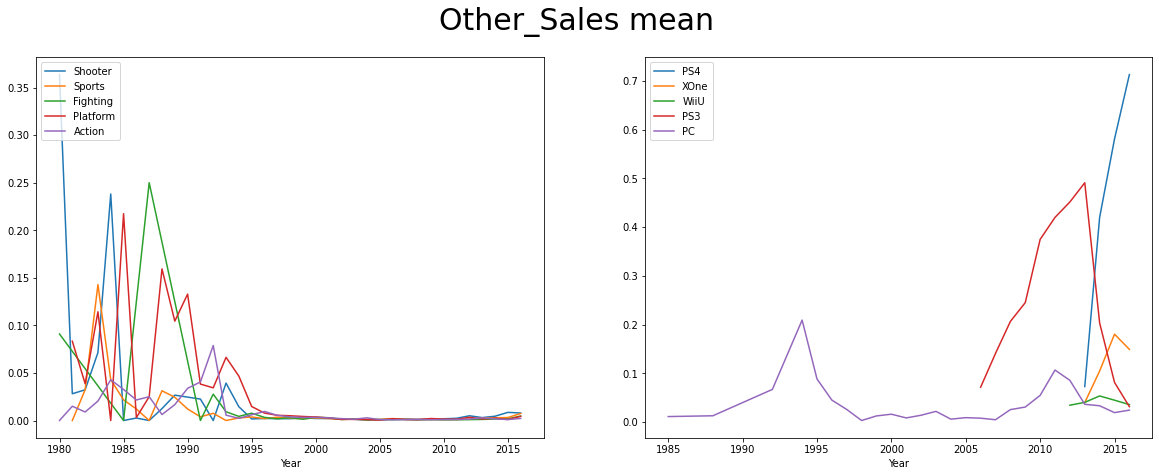

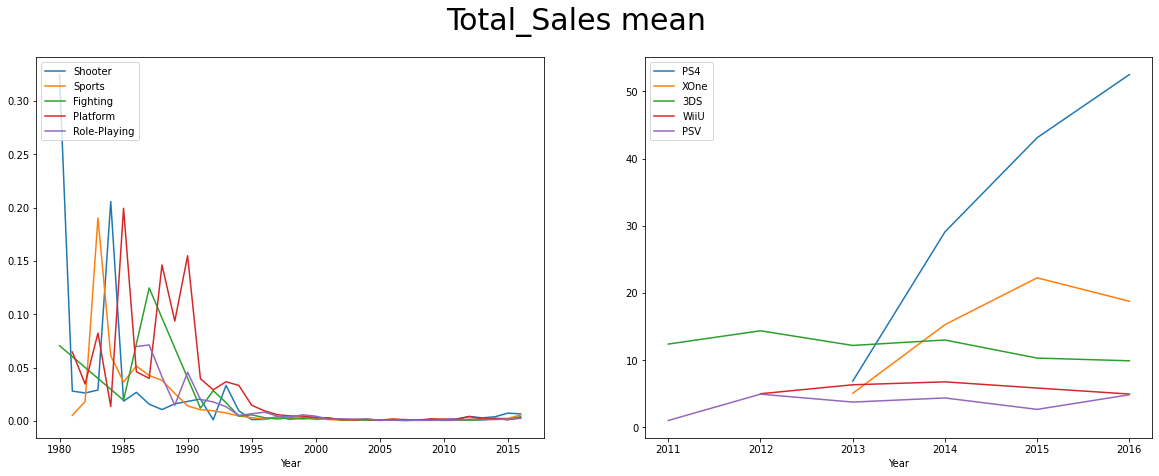




            Year  NA_Sales_x  EU_Sales_x  ...  JP_Sales_y  Other_Sales_y  Total_y
Platform                                  ...                                    
3DS       2016.0        0.83        0.57  ...       13.26           7.05    65.94
PS4       2016.0       10.21       15.34  ...       13.26           7.05    65.94
PSV       2016.0        0.19        0.30  ...       13.26           7.05    65.94
WiiU      2016.0        1.49        0.99  ...       13.26           7.05    65.94
XOne      2016.0        6.69        4.63  ...       13.26           7.05    65.94

[5 rows x 11 columns]
Platform
3DS      9.918107
PS4     52.487109
PSV      4.868062
WiiU     4.974219
XOne    18.774644
dtype: float64


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math


df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
print('a <= Year <= b')
print('a 입력하세요')
a = int(1000)
print('b 입력하세요')
b = int(2016)
df[(df['Year'] < a )] = np.nan    # Year < 1000  =>  nan
df[(df['Year'] > b )] = np.nan    # Year > 1000  =>  nan
df = df.dropna(subset = ['Year'])  # Year 열 결측치 삭제
df = df.dropna(subset = ['Genre'])  # Genre 열 결측치 삭제
df = df.sort_values(by = ['Year'], ascending = True) # 연도별 오름차순
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_N = df
# df = df.drop(['Name','Publisher'],axis=1)
# df['Year'] = pd.to_datetime(df['Year'], format = '%Y')  # Year 을 datetime64 형식으로 변환
df_G = df.groupby(['Year','Genre']).mean().reset_index()  # Year, Genre 별 평균or 합
df_Y = df.groupby(['Year']).sum().reset_index()  # Year 별 평균 or 합
df_P = df.groupby(['Year','Platform']).sum().reset_index()  # Year, Genre 별 평균 or 합
df_G = pd.merge(df_G,df_Y,how='left',on='Year')   
df_P = pd.merge(df_P,df_Y,how='left',on='Year')


#top3 함수정의
def top(df,col2,col1):   #df 에서 'col2' 별 'col1' 값의 top3 'series'반환
    A = (df[(df['Year'] == b)].sort_values(col1,ascending = False)[col2].head(5))
    C=[]
    for i in A:
        B = pd.DataFrame(df[df[col2]==i])
        C.append(B)
    return pd.concat(C)

    
df_G_N = top(df_G,'Genre','NA_Sales_x')
df_P_N = top(df_P,'Platform','NA_Sales_x')
df_G_E = top(df_G,'Genre','EU_Sales_x')
df_P_E = top(df_P,'Platform','EU_Sales_x')
df_G_J = top(df_G,'Genre','JP_Sales_x')
df_P_J = top(df_P,'Platform','JP_Sales_x')
df_G_O = top(df_G,'Genre','Other_Sales_x')
df_P_O = top(df_P,'Platform','Other_Sales_x')
df_G_T = top(df_G,'Genre','Total_x')
df_P_T = top(df_P,'Platform','Total_x')


#NA_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('NA_Sales mean', size = 30)

sns.lineplot(x=df_G_N['Year'], y=df_G_N['NA_Sales_x']/df_G_N['NA_Sales_y'], data=df_G_N['NA_Sales_x']/df_G_N['NA_Sales_y'],
             hue=df_G_N['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_N['Year'], y=df_P_N['NA_Sales_x']/df_P_N['NA_Sales_y'], data=df_P_N['NA_Sales_x']/df_P_N['NA_Sales_y'],
             hue=df_P_N['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#EU_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('EU_Sales mean', size = 30)

sns.lineplot(x=df_G_E['Year'], y=df_G_E['EU_Sales_x']/df_G_E['EU_Sales_y'], data=df_G_E['EU_Sales_x']/df_G_E['EU_Sales_y'],
             hue=df_G_E['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_E['Year'], y=df_P_E['EU_Sales_x']/df_P_E['EU_Sales_y'], data=df_P_E['EU_Sales_x']/df_P_E['EU_Sales_y'],
             hue=df_P_E['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#JP_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('JP_Sales mean', size = 30)

sns.lineplot(x=df_G_J['Year'], y=df_G_J['JP_Sales_x']/df_G_J['JP_Sales_y'], data=df_G_J['JP_Sales_x']/df_G_J['JP_Sales_y'],
             hue=df_G_J['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_J['Year'], y=df_P_J['JP_Sales_x']/df_P_J['JP_Sales_y'], data=df_P_J['JP_Sales_x']/df_P_J['JP_Sales_y'],
             hue=df_P_J['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#Other_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Other_Sales mean', size = 30)


sns.lineplot(x=df_G_O['Year'], y=df_G_O['Other_Sales_x']/df_G_O['Other_Sales_y'], data=df_G_O['Other_Sales_x']/df_G_O['Other_Sales_y'],
             hue=df_G_O['Genre'],
             ax=axes[0],
             legend = 'auto')
sns.lineplot(x=df_P_O['Year'], y=df_P_O['Other_Sales_x']/df_P_O['Other_Sales_y'], data=df_P_O['Other_Sales_x']/df_P_O['Other_Sales_y'],
             hue=df_P_O['Platform'],
             ax=axes[1],
             legend = 'auto',
             sizes=(.25, 2.5))
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales mean', size = 30)

sns.lineplot(x=df_G_T['Year'], y=df_G_T['Total_x']/df_G_T['Total_y'], data=df_G_T['Total_x']/df_G_T['Total_y'],
             hue=df_G_T['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P_T['Year'], y=df_P_T['Total_x']/df_P_T['Total_y']*100, data=df_P_T['Total_x']/df_P_T['Total_y']*100,
             hue=df_P_T['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')
plt.show()
print('''

''')
print(df_P_T[df_P_T['Year']==2016].groupby('Platform').sum())
print(df_P_T[df_P_T['Year']==2016].groupby('Platform').sum()['Total_x']/df_P_T[df_P_T['Year']==2016].groupby('Platform').sum()['Total_y']*100)

출고량이 높은 게임에 대한 분석 및 시각화 프로세스가 포함되어야 합니다.

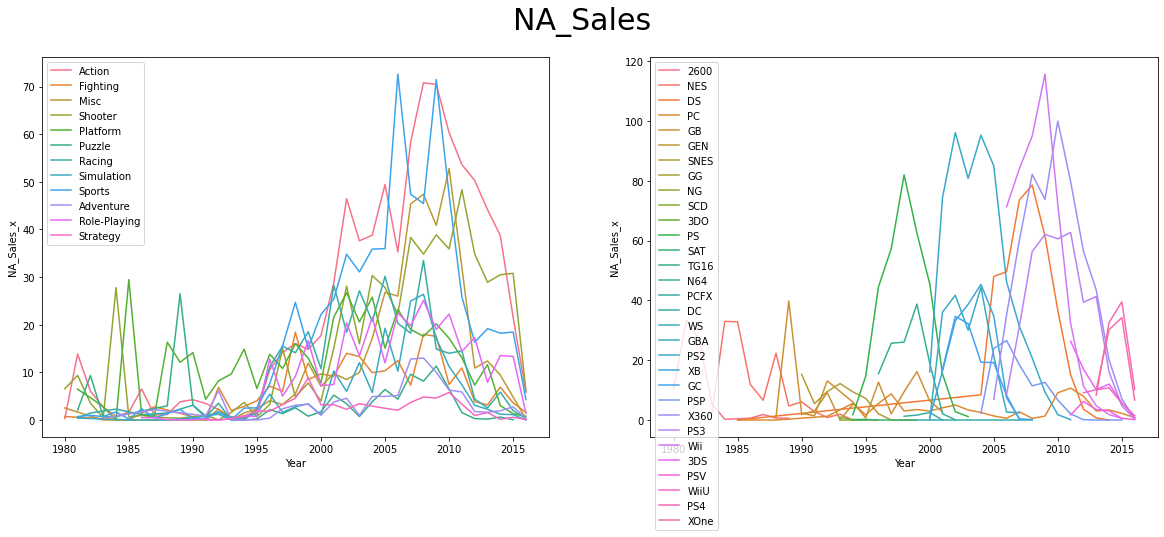

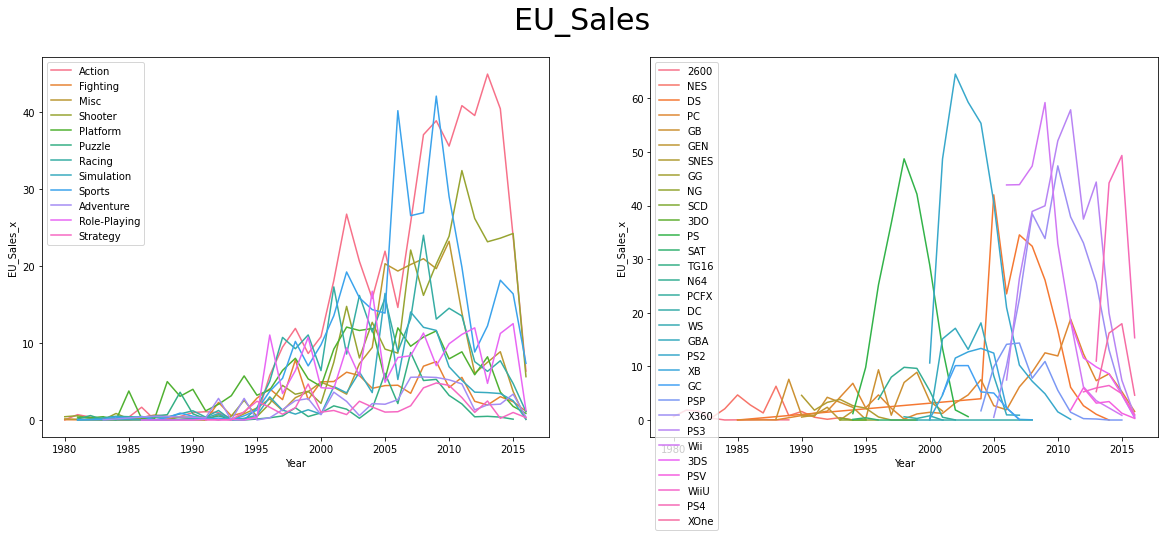

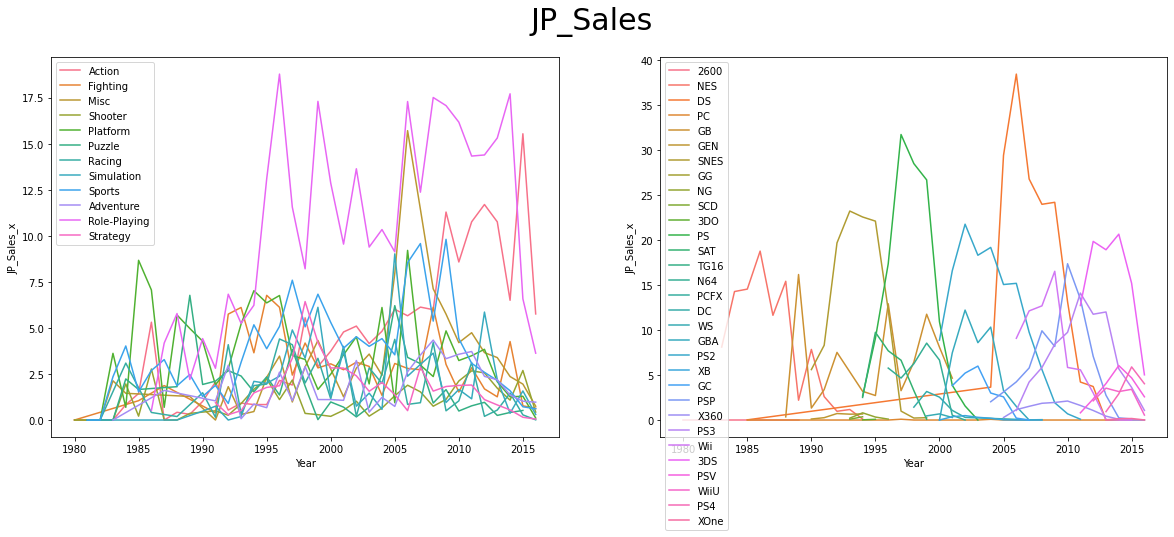

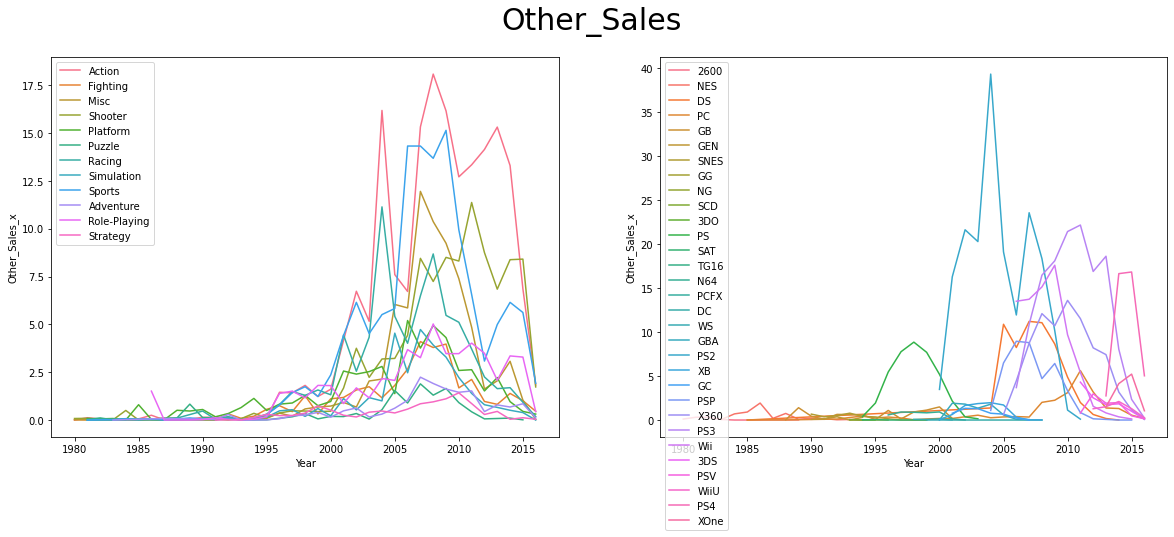

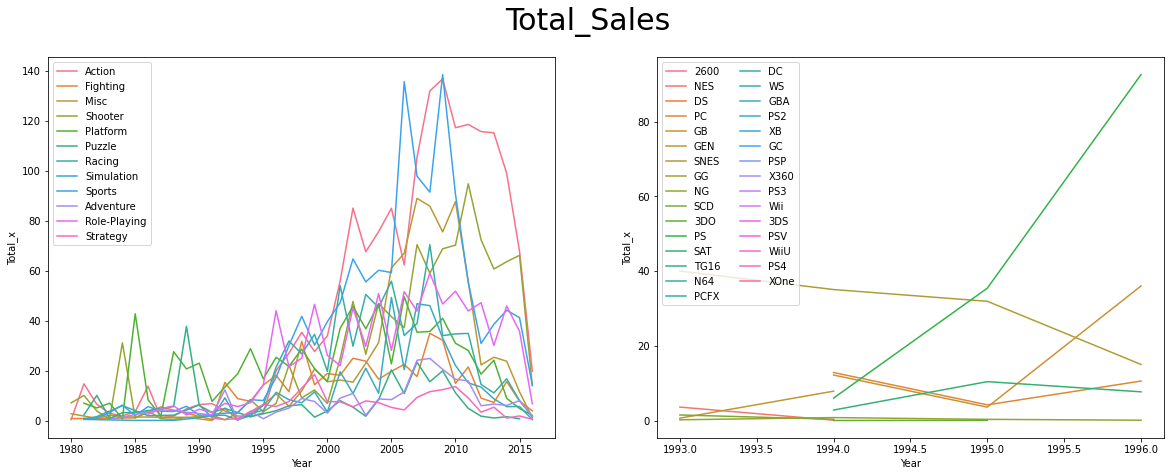

In [3]:
df_G = df.groupby(['Year','Genre']).sum().reset_index()  # Year, Genre 별 합
df_Y = df.groupby(['Year']).sum().reset_index()  # Year 별 합 
df_P = df.groupby(['Year','Platform']).sum().reset_index()  # Year, Genre 별 합
df_G = pd.merge(df_G,df_Y,how='left',on='Year')   
df_P = pd.merge(df_P,df_Y,how='left',on='Year')

#NA_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('NA_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['NA_Sales_x'], data=df_G['NA_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['NA_Sales_x'], data=df_P['NA_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#EU_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('EU_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['EU_Sales_x'], data=df_G['EU_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['EU_Sales_x'], data=df_P['EU_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#JP_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('JP_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['JP_Sales_x'], data=df_G['JP_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['JP_Sales_x'], data=df_P['JP_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')


#Other_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Other_Sales', size = 30)


sns.lineplot(x=df_G['Year'], y=df_G['Other_Sales_x'], data=df_G['Other_Sales_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')
sns.lineplot(x=df_P['Year'], y=df_P['Other_Sales_x'], data=df_P['Other_Sales_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto',
             sizes=(.25, 2.5))
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left')

plt.show()
print('''

''')

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['Total_x'], data=df_G['Total_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P[(df_P['Year']>=1993)&(df_P['Year']<1997)]['Year'], y=df_P['Total_x'], data=df_P['Total_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left')
axes[1].legend(loc = 'upper left',ncol=2 )

plt.show()
print('''

''')



                   NA_Sales  EU_Sales  JP_Sales  Other_Sales     Total  NA_rank  EU_rank  JP_rank  Other_rank
Year   Genre                                                                                                 
1980.0 Action      0.320000  0.020000       0.0     0.000000  0.340000      4.0      4.0      4.0         4.0
       Fighting    0.720000  0.040000       0.0     0.010000  0.770000      2.0      2.0      4.0         2.0
       Misc        0.632500  0.037500       0.0     0.005000  0.675000      3.0      3.0      4.0         3.0
       Shooter     3.280000  0.215000       0.0     0.040000  3.535000      1.0      1.0      4.0         1.0
1981.0 Action      0.554400  0.028000       0.0     0.004800  0.587200      4.0      5.0      7.0         4.0
       Platform    2.156667  0.123333       0.0     0.026667  2.306667      1.0      1.0      7.0         1.0
       Puzzle      1.045000  0.065000       0.0     0.015000  1.125000      2.0      2.0      7.0         2.0
       Rac

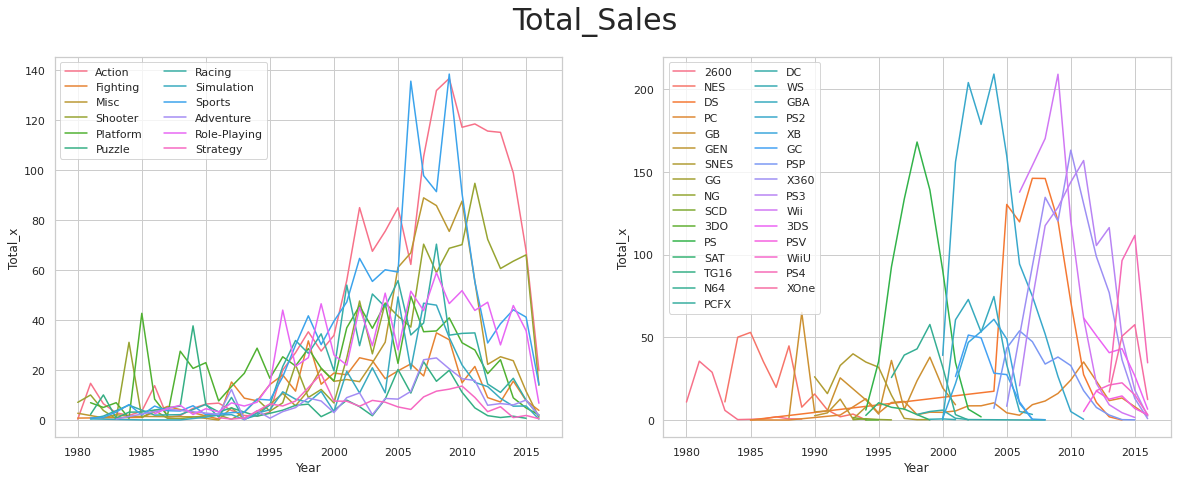




             NA_rank   EU_rank   JP_rank  Other_rank
NA_rank     1.000000  0.855936  0.303601    0.832614
EU_rank     0.855936  1.000000  0.257057    0.889000
JP_rank     0.303601  0.257057  1.000000    0.336723
Other_rank  0.832614  0.889000  0.336723    1.000000
95% 신뢰구간:  1990.0367568385225 1993.9632431614775
3.926486322955043
95% 신뢰구간:  1998.543928659606 2005.7417856261081
7.197856966502059
95% 신뢰구간:  1994.5366856922724 1998.4633143077276
3.926628615455229
95% 신뢰구간:  nan nan
nan
95% 신뢰구간:  2001.4521753282204 2005.5478246717796
4.0956493435592165
95% 신뢰구간:  1996.3341494103865 2000.6658505896135
4.331701179226911
95% 신뢰구간:  1986.209142013463 1990.790857986537
4.581715973074097
95% 신뢰구간:  nan nan
nan
95% 신뢰구간:  1999.6746339049985 2006.4792122488477
6.8045783438492435
95% 신뢰구간:  2011.5366856922724 2015.4633143077276
3.926628615455229
95% 신뢰구간:  2008.3341494103865 2012.6658505896135
4.331701179226911
95% 신뢰구간:  1982.3341494103865 1986.6658505896135
4.331701179226911
95% 신뢰구간:  1992.3

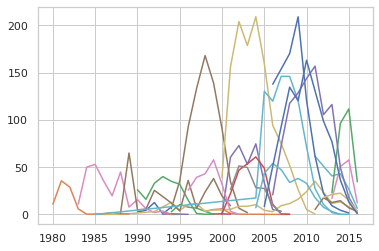

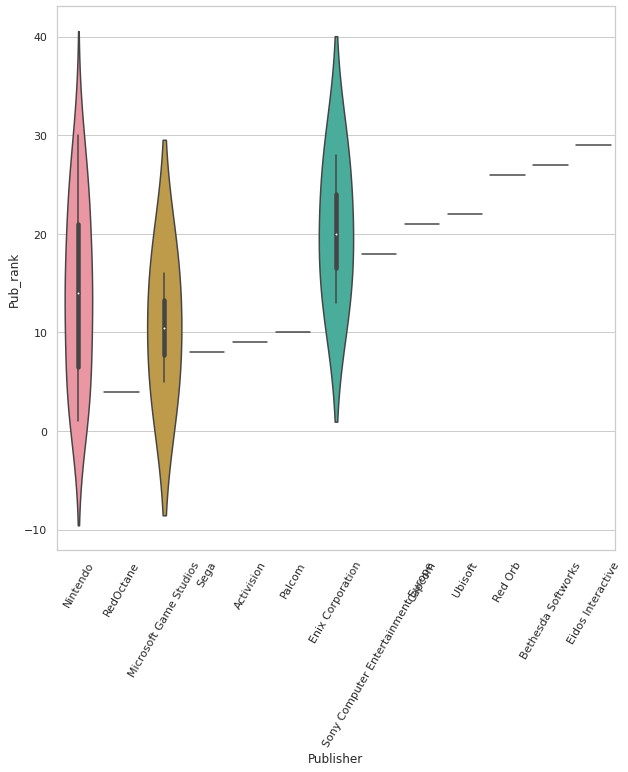

In [23]:
df_N['NA_rank'] = df_N['NA_Sales'].rank(method = 'min', ascending = False)
df_N['EU_rank'] = df_N['EU_Sales'].rank(method = 'min', ascending = False)
df_N['JP_rank'] = df_N['JP_Sales'].rank(method = 'min', ascending = False)
df_N['Other_rank'] = df_N['Other_Sales'].rank(method = 'min', ascending = False)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 150)
# print(df_N.sort_values('NA_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
# print('''

# ''')
# print(df_N.sort_values('EU_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
# print('''

# ''')
# print(df_N.sort_values('JP_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
# print('''

# ''')
# print(df_N.sort_values('Other_Sales',ascending = False)[['Name','Year','Genre','NA_rank','EU_rank','JP_rank','Other_rank']].head(5))
df3 = df.groupby(['Year','Genre']).mean()
df3 = df3.reset_index()
i = 1980



# rank

######### Genre ############

NA_rank = pd.DataFrame()
EU_rank = pd.DataFrame()
JP_rank = pd.DataFrame()
Other_rank = pd.DataFrame()

while i <= b:    
    NA_rank = pd.concat([NA_rank,df3[(df3['Year']==i)]['NA_Sales'].rank(method = 'max', ascending = False).T])
    
    EU_rank = pd.concat([EU_rank,df3[(df3['Year']==i)]['EU_Sales'].rank(method = 'max', ascending = False).T])
  
    JP_rank = pd.concat([JP_rank,df3[(df3['Year']==i)]['JP_Sales'].rank(method = 'max', ascending = False).T])
 
    Other_rank = pd.concat([Other_rank,df3[(df3['Year']==i)]['Other_Sales'].rank(method = 'max', ascending = False).T])
    i += 1
   
df3['NA_rank'] = NA_rank
df3['EU_rank'] = EU_rank
df3['JP_rank'] = JP_rank    
df3['Other_rank'] = Other_rank

#F-stat by scipy
from scipy.stats import f_oneway
f_oneway(NA_rank, EU_rank, JP_rank, Other_rank) 

#CI with scipy
from scipy.stats import t

sample = df3[['NA_rank','EU_rank','JP_rank','Other_rank']]
print(df3.groupby(['Year','Genre']).sum().head(20))
# 표본의 크기
n = len(sample)
# 자유도
dof = n-1
# 평균의 평균
mean = np.mean(sample)
# 표본의 표준편차
sample_std = np.std(sample, ddof = 1)
# 표준 오차
std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)
CI = t.interval(.95, dof, loc = mean, scale = std_err)
print("95% 신뢰구간: ", mean, CI)

print(sample.corr())


######### Platform ############

df4 = df.groupby(['Year','Platform']).mean()
df4 = df4.reset_index()

NA_rank = pd.DataFrame()
EU_rank = pd.DataFrame()
JP_rank = pd.DataFrame()
Other_rank = pd.DataFrame()

i = 1980
while i <= b:    
    NA_rank = pd.concat([NA_rank,df4[(df4['Year']==i)]['NA_Sales'].rank(method = 'max', ascending = False).T])
    
    EU_rank = pd.concat([EU_rank,df4[(df4['Year']==i)]['EU_Sales'].rank(method = 'max', ascending = False).T])
  
    JP_rank = pd.concat([JP_rank,df4[(df4['Year']==i)]['JP_Sales'].rank(method = 'max', ascending = False).T])
 
    Other_rank = pd.concat([Other_rank,df4[(df4['Year']==i)]['Other_Sales'].rank(method = 'max', ascending = False).T])
    i += 1
   
df4['NA_rank'] = NA_rank
df4['EU_rank'] = EU_rank
df4['JP_rank'] = JP_rank    
df4['Other_rank'] = Other_rank

sample = df4[['NA_rank','EU_rank','JP_rank','Other_rank']]

#Total_Sales 시계열

fig, axes = plt.subplots(1, 2, figsize=(20,7)) 
fig.suptitle('Total_Sales', size = 30)

sns.lineplot(x=df_G['Year'], y=df_G['Total_x'], data=df_G['Total_x'],
             hue=df_G['Genre'],
             ax=axes[0],
             legend = 'auto')

sns.lineplot(x=df_P['Year'], y=df_P['Total_x'], data=df_P['Total_x'],
             hue=df_P['Platform'],
             ax=axes[1],
             legend = 'auto')
axes[0].legend(loc = 'upper left', ncol= 2)
axes[1].legend(loc = 'upper left',ncol=2 )

plt.show()
print('''

''')

print(sample.corr())
Platform = list(set(df4['Platform']))
df_Platform = df.groupby(['Year','Platform']).sum().reset_index()

import scipy as sp
deadline = []
for p in Platform:
    plt.plot(df_Platform[(df_Platform['Platform']== p)]['Year'],df_Platform[(df_Platform['Platform']== p)]['Total'])
    # 표본의 크기
    n = len(df_Platform[(df_Platform['Platform']== p)]['Year'])
    # 자유도
    dof = n-1
    # 평균의 평균
    mean = np.mean(df_Platform[(df_Platform['Platform']== p)]['Year'])
    # 표본의 표준편차
    sample_std = np.std(df_Platform[(df_Platform['Platform']== p)]['Year'], ddof = 1)
    # 표준 오차
    std_err = sample_std / n ** 0.5 # sample_std / sqrt(n)

    L,H = t.interval(.95, dof, loc = mean, scale = std_err)
    print("95% 신뢰구간: ", L,H)
    print(H-L)
    deadline.append(H-L)

print(pd.DataFrame(deadline).mean())

######### Publisher ############

df5 = df.groupby(['Year','Publisher']).mean()
df5 = df5.reset_index()

NA_rank = pd.DataFrame()
EU_rank = pd.DataFrame()
JP_rank = pd.DataFrame()
Other_rank = pd.DataFrame()

i = 1980
while i <= b:    
    NA_rank = pd.concat([NA_rank,df5[(df5['Year']==i)]['NA_Sales'].rank(method = 'max', ascending = False).T])
    
    EU_rank = pd.concat([EU_rank,df5[(df5['Year']==i)]['EU_Sales'].rank(method = 'max', ascending = False).T])
  
    JP_rank = pd.concat([JP_rank,df5[(df5['Year']==i)]['JP_Sales'].rank(method = 'max', ascending = False).T])
 
    Other_rank = pd.concat([Other_rank,df5[(df5['Year']==i)]['Other_Sales'].rank(method = 'max', ascending = False).T])
    i += 1
   
df5['NA_rank'] = NA_rank
df5['EU_rank'] = EU_rank
df5['JP_rank'] = JP_rank    
df5['Other_rank'] = Other_rank

sample = df5[['NA_rank','EU_rank','JP_rank','Other_rank']]
print(sample.corr())
################# 퍼블리셔-랭킹 ######################

df5['Pub_rank'] = df5['Total'].rank(method = 'max', ascending = False).T
df5 = df5.sort_values('Pub_rank',ascending=True)
print(df5.value_counts('Publisher'))

sns.set_theme(style="whitegrid")
plt.figure(figsize=(10,10))
plt.xticks(rotation=60)
ax = sns.violinplot(x=df5['Publisher'].head(30) , y="Pub_rank", data=df5)

fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
a <= Year <= b
a 입력하세요
b 입력하세요


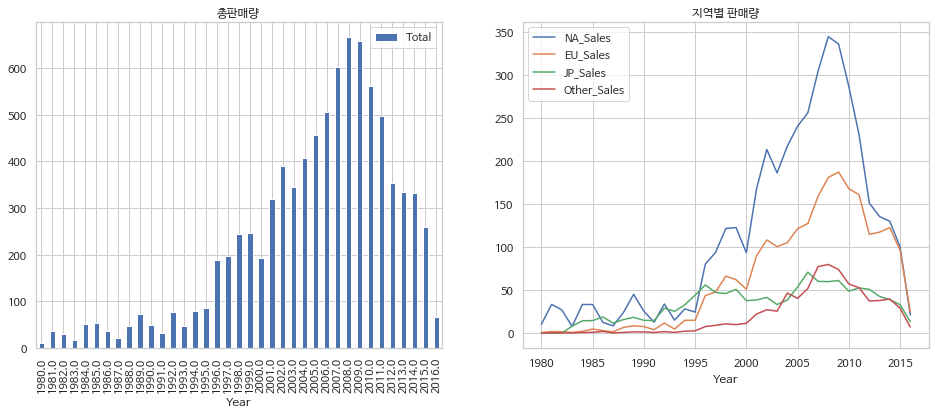

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


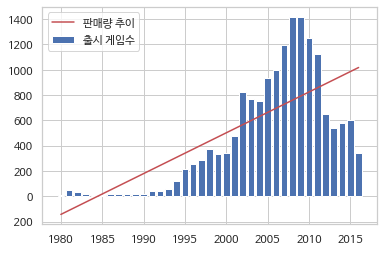

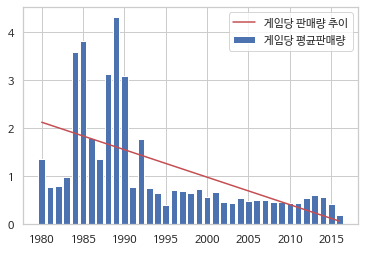

        Year  Total
2908  2006.0  82.74


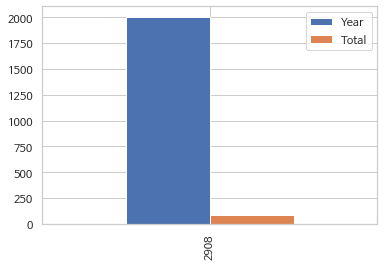

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
from sklearn.datasets import make_blobs
from sklearn import decomposition
import matplotlib as mpl
from scipy import stats

###########################################
!apt -qq -y install fonts-nanum
 
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

##########################################

df = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/datasets/vgames2.csv')    
df.iloc[:,6:10] = df.iloc[:,6:10].apply(pd.to_numeric, errors='coerce')      #데이터 numeric
df.iloc[:,6:10] = df.iloc[:,6:10].fillna(0)      #결측값 0
df = df.drop('Unnamed: 0',axis=1)    # 1열 삭제
# print(df.isna().sum())  #결측치 확인
print('a <= Year <= b')
print('a 입력하세요')
a = int(1000)
print('b 입력하세요')
b = int(2016)
df[(df['Year'] < a )] = np.nan    # Year < 1000  =>  nan
df[(df['Year'] > b )] = np.nan    # Year > 1000  =>  nan
df = df.dropna(subset = ['Year'])  # Year 열 결측치 삭제
df = df.dropna(subset = ['Genre'])  # Genre 열 결측치 삭제
df = df.sort_values(by = ['Year'], ascending = True) # 연도별 오름차순
df['Total'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df_N = df
df2 = df[['Year', 'Total']].groupby(['Year']).sum()['Total'].reset_index()
df2['count']=df.value_counts('Year', sort = False ).reset_index()[0]

# print(df)
# print(df.groupby(['Year','Genre']).sum())


f,ax = plt.subplots(1,2,figsize = (16,6))
df[['Year', 'Total']].groupby(['Year']).sum().plot.bar(ax=ax[0])
ax[0].set_title('총판매량')
df[['Year', 'NA_Sales','EU_Sales','JP_Sales','Other_Sales']].groupby(['Year']).sum().plot.line(ax=ax[1])
ax[1].set_title('지역별 판매량')
plt.legend
plt.show()


res = stats.linregress(df2['Year'], df.value_counts('Year', sort = False ))
plt.bar(df2['Year'],df.value_counts('Year', sort = False ) ,label='출시 게임수')
plt.plot(df2['Year'], res.intercept + res.slope*df2['Year'], 'r', label='판매량 추이')
plt.legend()
plt.show()


res = stats.linregress(df2['Year'], df2['Total']/df2['count'])
plt.bar(df2['Year'],df2['Total']/df2['count'] ,label='게임당 평균판매량')
plt.plot(df2['Year'], res.intercept + res.slope*df2['Year'], 'r', label='게임당 판매량 추이')
plt.legend()
plt.show()

print(df[df['Name']=='Wii Sports'][['Year','Total']])
df[df['Name']=='Wii Sports'][['Year','Total']].plot.bar()
plt.show()

In [6]:
df_N.sort_values(by = ['Total'], ascending = False).head(30)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total
2908,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
4199,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
12579,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
7829,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
1203,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6937,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
16531,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.61
10488,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31
